In [ ]:
# ! pip install grad-cam

In [1]:
import cv2 
import numpy as np 
import torch 
import torchvision
import json
import matplotlib.pyplot as plt

from models.MAT import MAT

from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputSoftmaxTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

c:\Users\deela\anaconda3\envs\vip22\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
def load_model(chk_path, config_path):
    with open(config_path, 'r') as pf:
        model_config = json.load(pf)

    model = MAT(**model_config)
    model_checkpoint = torch.load(chk_path)
    model.load_state_dict(model_checkpoint['state_dict'])
    model.eval()

    return model 

In [4]:
test_model = load_model('./checkpoints/Efb4/ckpt_4.pth', './tmp/model_config.json')

In [5]:
def load_sample(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    print(image.shape)
    image = cv2.resize(image, (200, 200))
    print(image.shape)
    # image = np.transpose(image, (2,0,1))[np.newaxis, ...]
    # print(image.shape)
    # image_tensor = torch.from_numpy(image).float()
    # print(image_tensor.shape)
    return image

In [39]:
sample_tensor = load_sample('./data/SampleData/1.jpg')
image_float_np = np.float32(sample_tensor) / 255
# define the torchvision image transforms
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

input_tensor = transform(sample_tensor)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# input_tensor = input_tensor.to(device)
# Add a batch dimension:
input_tensor = input_tensor.unsqueeze(0)

(1250, 1000, 3)
(200, 200, 3)


In [40]:
input_tensor.size()

torch.Size([1, 3, 200, 200])

In [41]:
from cgi import test


for name, layer in test_model.named_modules():
  print(name, layer)

 MAT(
  (net): xception(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (block1): Block(
      (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (rep): Sequential(
        (0): SeparableConv2d(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)


In [58]:
test_model.net.block12

Block(
  (skip): Conv2d(728, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
  (skipbn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rep): Sequential(
    (0): ReLU()
    (1): SeparableConv2d(
      (conv1): Conv2d(728, 728, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=728, bias=False)
      (pointwise): Conv2d(728, 728, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (2): BatchNorm2d(728, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): SeparableConv2d(
      (conv1): Conv2d(728, 728, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=728, bias=False)
      (pointwise): Conv2d(728, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (5): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
)

In [59]:

target_layer = test_model.net.block12
cam = GradCAM(model=test_model, target_layers=[target_layer], use_cuda=True)


In [63]:
# In this example grayscale_cam has only one image in the batch:
target = [ClassifierOutputSoftmaxTarget(0)]
grayscale_cam = cam(input_tensor=input_tensor, targets=target, aug_smooth=False)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(image_float_np, grayscale_cam, use_rgb=True)

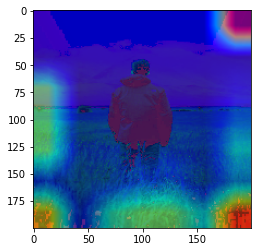

In [68]:
plt.imshow(visualization)

---

In [71]:
test_model = load_model('./checkpoints/Efb4/ckpt_4.pth', './tmp/model_config.json')

In [6]:
def load_sample(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    image = cv2.resize(image, (200, 200))
    print(image.shape)
    # image = np.transpose(image, (2,0,1))[np.newaxis, ...]
    # print(image.shape)
    # image_tensor = torch.from_numpy(image).float()
    # print(image_tensor.shape)
    return image

In [108]:
sample_tensor = load_sample('./data/SampleData/4.png')
image_float_np = np.float32(sample_tensor) / 255
# define the torchvision image transforms
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

input_tensor = transform(sample_tensor)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# input_tensor = input_tensor.to(device)
# Add a batch dimension:
input_tensor = input_tensor.unsqueeze(0)

(512, 512, 3)
(200, 200, 3)


In [109]:

target_layer = test_model.net.block12
cam = GradCAM(model=test_model, target_layers=[target_layer], use_cuda=True)

In [110]:
target = [ClassifierOutputSoftmaxTarget(1)]
grayscale_cam = cam(input_tensor=input_tensor, targets=target, aug_smooth=False)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(image_float_np, grayscale_cam, use_rgb=True)

---

In [7]:
def show_cam(image_path, target_label):
    sample_tensor = load_sample(image_path)
    image_float_np = np.float32(sample_tensor) / 255
    # define the torchvision image transforms
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])
    input_tensor = transform(sample_tensor)
    input_tensor = input_tensor.unsqueeze(0)

    target_layer = test_model.net.block12
    cam = GradCAM(model=test_model, target_layers=[target_layer], use_cuda=True)

    target = [ClassifierOutputSoftmaxTarget(1)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=target, aug_smooth=False)
    grayscale_cam = grayscale_cam[0, :]
    visualization = show_cam_on_image(image_float_np, grayscale_cam, use_rgb=True)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
    ax1.imshow(sample_tensor/255)
    ax2.imshow(visualization)

(1250, 1000, 3)
(200, 200, 3)


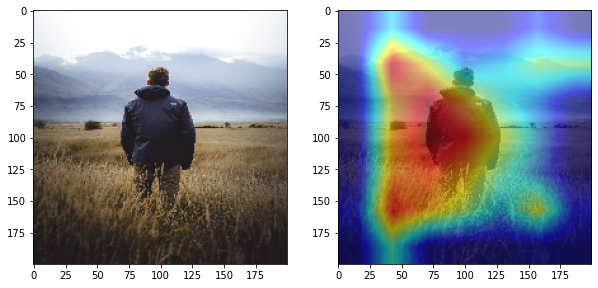

In [8]:
show_cam('./data/SampleData/1.jpg', 0)

(256, 256, 3)
(200, 200, 3)


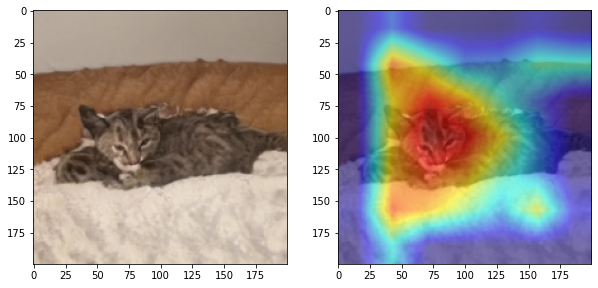

In [9]:
show_cam('./data/SampleData/2.png', 1)

(235, 343, 3)
(200, 200, 3)


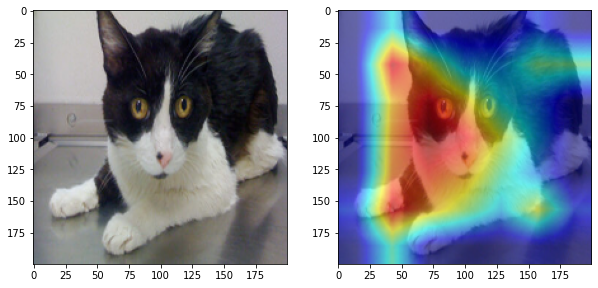

In [118]:
show_cam('./data/SampleData/3.jpg', 0)

(512, 512, 3)
(200, 200, 3)


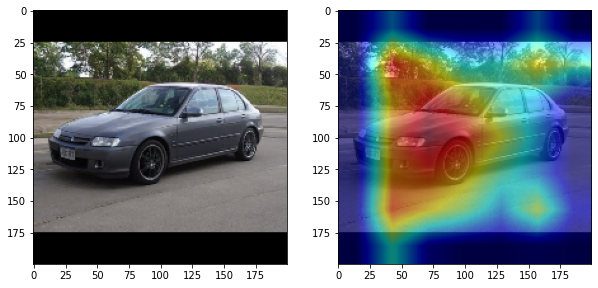

In [11]:
show_cam('./data/SampleData/4.png', 4)